In [1]:
!pip install pandas
import pandas as pd
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip
# Dataset URLs
sift_url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv"
foldx_url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv"

# Define column names
sift_columns = ["Protein", "Amino_Acid", "sift_Score"]
foldx_columns = ["Protein", "Amino_Acid", "foldX_Score"]

# Read datasets with correct separation and column names
sift_df = pd.read_csv(sift_url, sep="\t", names=sift_columns, header=0, engine="python")
foldx_df = pd.read_csv(foldx_url, sep="\t", names=foldx_columns, header=0, engine="python")

# Display first few rows to check structure
print("SIFT Dataset:")
print(sift_df.head())

print("\nFoldX Dataset:")
print(foldx_df.head())

# Print column names to confirm they are correct now
print("\nUpdated SIFT Dataset Columns:", sift_df.columns.tolist())
print("Updated FoldX Dataset Columns:", foldx_df.columns.tolist())


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\USER\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


SIFT Dataset:
  Protein Amino_Acid  sift_Score
0  A5A607       K60Q    0.197799
1  A5A607       Y56C    0.174970
2  A5A607       Y56S    0.415581
3  A5A630       A16V    0.516738
4  A5A630       A47T    0.387271

FoldX Dataset:
  Protein Amino_Acid  foldX_Score
0  A5A607       E63D      1.84216
1  A5A607       K60Q      0.51710
2  A5A607       Y56C      0.72870
3  A5A607       Y56S      0.84212
4  P00350      A117S     -0.09854

Updated SIFT Dataset Columns: ['Protein', 'Amino_Acid', 'sift_Score']
Updated FoldX Dataset Columns: ['Protein', 'Amino_Acid', 'foldX_Score']


In [2]:
# Create the specific_Protein_aa column
sift_df["specific_Protein_aa"] = sift_df["Protein"] + "_" + sift_df["Amino_Acid"]
foldx_df["specific_Protein_aa"] = foldx_df["Protein"] + "_" + foldx_df["Amino_Acid"]

# Merge datasets on 'specific_Protein_aa'
final_df = pd.merge(sift_df, foldx_df, on="specific_Protein_aa", how="inner")

# Display first few rows of the final dataset
print("Final Merged Dataset:")
print(final_df.head())

# Save the merged dataset to a new TSV file
final_df.to_csv("merged_dataset.tsv", sep="\t", index=False)

Final Merged Dataset:
  Protein_x Amino_Acid_x  sift_Score specific_Protein_aa Protein_y  \
0    A5A607         K60Q    0.197799         A5A607_K60Q    A5A607   
1    A5A607         Y56C    0.174970         A5A607_Y56C    A5A607   
2    A5A607         Y56S    0.415581         A5A607_Y56S    A5A607   
3    P00350        A117S    0.401519        P00350_A117S    P00350   
4    P00350        A117T    0.282769        P00350_A117T    P00350   

  Amino_Acid_y  foldX_Score  
0         K60Q      0.51710  
1         Y56C      0.72870  
2         Y56S      0.84212  
3        A117S     -0.09854  
4        A117T      0.92352  


In [3]:
# Convert scores to numeric to avoid issues with string data
final_df["sift_Score"] = pd.to_numeric(final_df["sift_Score"], errors="coerce")
final_df["foldX_Score"] = pd.to_numeric(final_df["foldX_Score"], errors="coerce")

# Filter for mutations that are deleterious in both SIFT and FoldX
deleterious_mutations = final_df[(final_df["sift_Score"] < 0.05) & (final_df["foldX_Score"] > 2)]

# Display the filtered dataset
print("Deleterious Mutations (Affect Both Structure & Function):")
print(deleterious_mutations)

# Save to a new TSV file
deleterious_mutations.to_csv("deleterious_mutations.tsv", sep="\t", index=False)


Deleterious Mutations (Affect Both Structure & Function):
      Protein_x Amino_Acid_x  sift_Score specific_Protein_aa Protein_y  \
82       P00350         G48C    0.031864         P00350_G48C    P00350   
100      P00350        L115F    0.028872        P00350_L115F    P00350   
102      P00350        L204F    0.009560        P00350_L204F    P00350   
103      P00350        L208R    0.027592        P00350_L208R    P00350   
209      P00363        I150F    0.048688        P00363_I150F    P00363   
...         ...          ...         ...                 ...       ...   
75267    Q6BEX0        V211F    0.013334        Q6BEX0_V211F    Q6BEX0   
75277    Q6BF16         A97V    0.039486         Q6BF16_A97V    Q6BF16   
75281    Q6BF16         G80S    0.000000         Q6BF16_G80S    Q6BF16   
75311    Q6BF17        G250C    0.028912        Q6BF17_G250C    Q6BF17   
75315    Q6BF17        H298N    0.014758        Q6BF17_H298N    Q6BF17   

      Amino_Acid_y  foldX_Score  
82            G48C 

In [6]:
 #Dictionary mapping single-letter amino acid codes to full names
amino_acid_dict = {
    "A": "Alanine", "R": "Arginine", "N": "Asparagine", "D": "Aspartic Acid",
    "C": "Cysteine", "E": "Glutamic Acid", "Q": "Glutamine", "G": "Glycine",
    "H": "Histidine", "I": "Isoleucine", "L": "Leucine", "K": "Lysine",
    "M": "Methionine", "F": "Phenylalanine", "P": "Proline", "S": "Serine",
    "T": "Threonine", "W": "Tryptophan", "Y": "Tyrosine", "V": "Valine"
}
    # Extract first amino acid from each mutation
deleterious_mutations["First_Amino_Acid"] = deleterious_mutations["Amino_Acid_x"].str[0]

# Count occurrences of each first amino acid
amino_acid_counts = deleterious_mutations["First_Amino_Acid"].value_counts()

# Convert single-letter codes to full names
amino_acid_counts_full = {amino_acid_dict[k]: v for k, v in amino_acid_counts.items() if k in amino_acid_dict}

# Convert to a DataFrame for better visualization
amino_acid_df = pd.DataFrame(list(amino_acid_counts_full.items()), columns=["Amino Acid", "Frequency"])

# Display the frequency table
print(amino_acid_df)

       Amino Acid  Frequency
0         Glycine       1307
1         Leucine        739
2         Alanine        640
3         Proline        470
4          Valine        380
5        Arginine        227
6      Isoleucine        212
7        Tyrosine        172
8   Aspartic Acid        171
9   Phenylalanine        169
10         Serine        158
11      Threonine        126
12     Tryptophan        108
13     Methionine         87
14       Cysteine         74
15     Asparagine         60
16  Glutamic Acid         50
17      Histidine         47
18      Glutamine         40
19         Lysine         24


C:\Users\USER\AppData\Local\Temp\ipykernel_15904\3271644402.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deleterious_mutations["First_Amino_Acid"] = deleterious_mutations["Amino_Acid_x"].str[0]


C:\Users\USER\AppData\Local\Temp\ipykernel_15904\1686102831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Amino Acid", y="Frequency", data=amino_acid_df, palette="viridis")


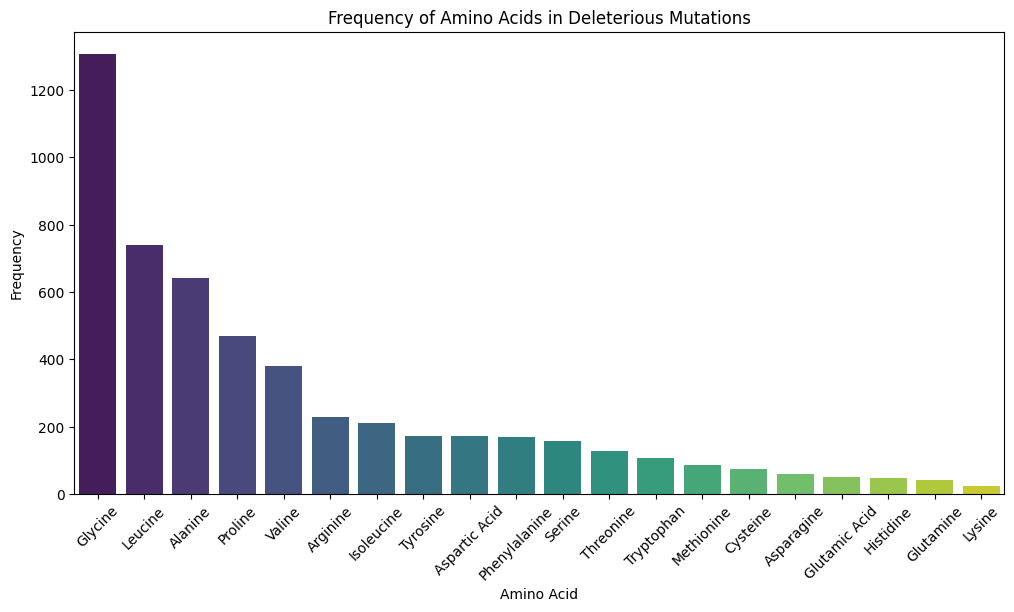

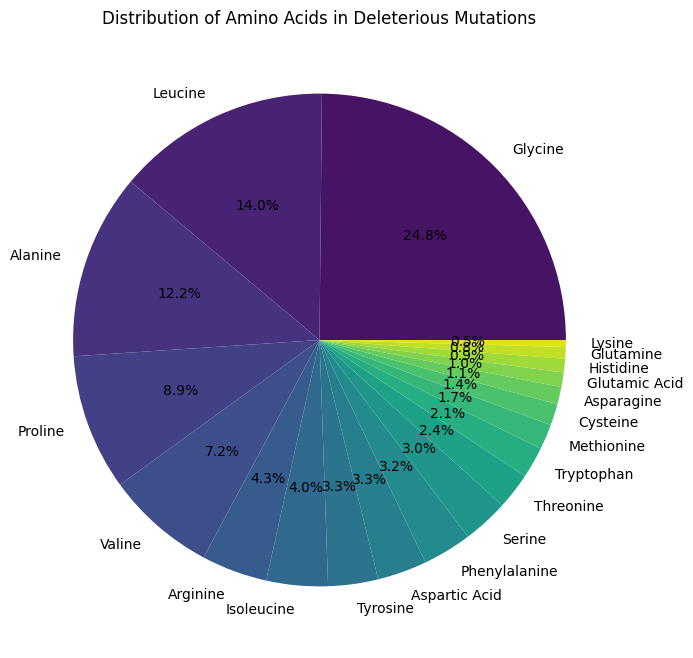

In [7]:
# Sort values for better visualization
amino_acid_df = amino_acid_df.sort_values(by="Frequency", ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Amino Acid", y="Frequency", data=amino_acid_df, palette="viridis")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Frequency of Amino Acids in Deleterious Mutations")
plt.xticks(rotation=45)
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(amino_acid_df["Frequency"], labels=amino_acid_df["Amino Acid"], autopct="%1.1f%%", colors=sns.color_palette("viridis", len(amino_acid_df)))
plt.title("Distribution of Amino Acids in Deleterious Mutations")
plt.show()
